In [1]:
# import libraries and modules

import torch

from setup import *

# from axis_angle import *
from quaternion import *

from quaternion_analysis import *
from pytorch3d.transforms import matrix_to_quaternion


In [2]:
# Set the cuda device 

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")


# TEAPOT

In [3]:
teapot_path = "data/teapot.obj"
obj_name = teapot_path.split(".")[-2].split("/")[-1]
print("Loading", obj_name)
teapot_mesh = load_mesh(teapot_path, device=device, scale=1)
silhoutte_renderer, phong_renderer = get_renderers(image_size=256, device=device)

Loading teapot


/opt/anaconda3/envs/mr_a1/lib/python3.12/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


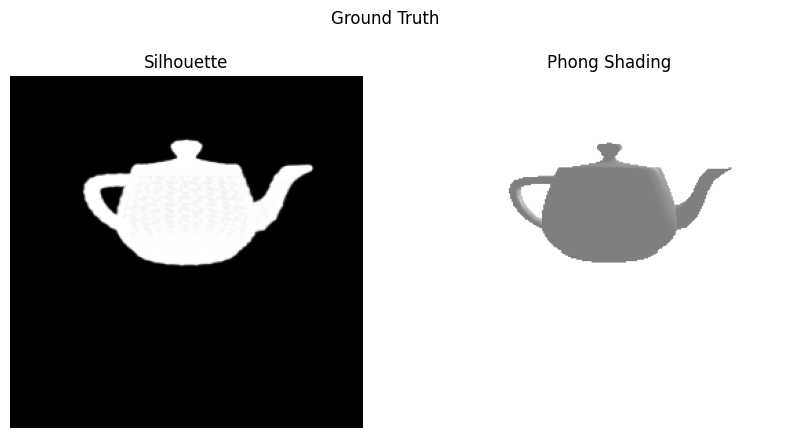

In [4]:
# Ground truth parameters

params = {
    "dist": 3,
    "elev": 15,
    "azim": 5
}

silhoutte_gt_teapot, phong_gt_teapot, R_gt, T_gt = get_ground_truth(teapot_mesh, silhoutte_renderer, phong_renderer, params, device)
plot_images(silhoutte_gt_teapot, phong_gt_teapot)

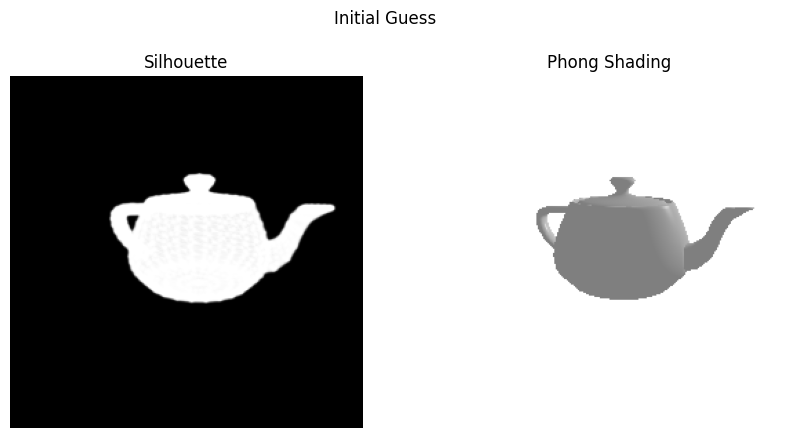

In [5]:
variances = {
    "dist": 1,
    "elev": 30,
    "azim": 30
}

R_init, T_init = get_initial_R_T(params=params, variances=variances, deltaT=0.2, device=device)
plot_initial_guess(teapot_mesh, silhoutte_renderer, phong_renderer, R_init, T_init)

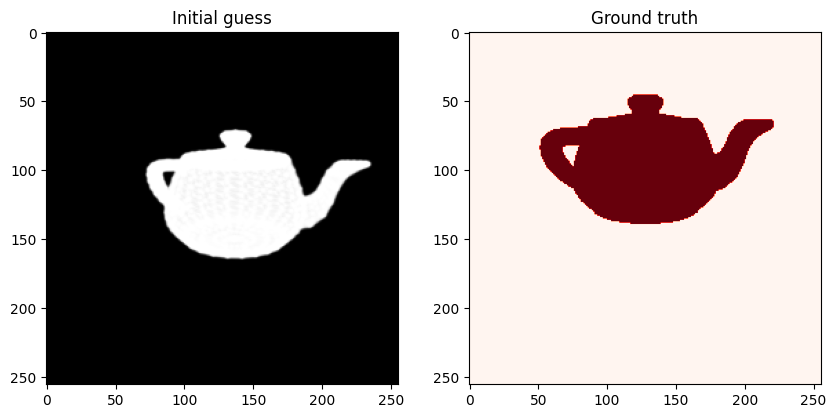

  0%|          | 0/10 [00:15<?, ?it/s]

iteration: 0, loss: 7415.06298828125


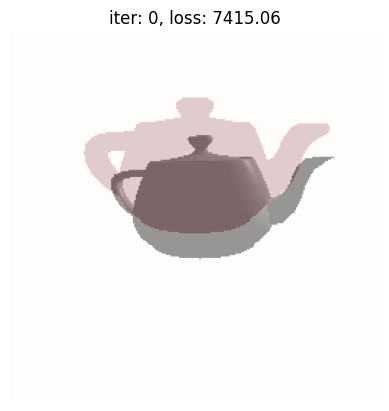

 20%|██        | 2/10 [00:31<02:05, 15.70s/it]

iteration: 1, loss: 6658.1826171875


 30%|███       | 3/10 [00:46<01:46, 15.16s/it]

iteration: 2, loss: 5346.8193359375


 40%|████      | 4/10 [01:00<01:29, 14.91s/it]

iteration: 3, loss: 4225.9326171875


 50%|█████     | 5/10 [01:14<01:13, 14.67s/it]

iteration: 4, loss: 3858.094482421875


 60%|██████    | 6/10 [01:29<00:58, 14.63s/it]

iteration: 5, loss: 3447.091552734375


 70%|███████   | 7/10 [01:45<00:45, 15.00s/it]

iteration: 6, loss: 2863.65185546875


 80%|████████  | 8/10 [02:00<00:30, 15.07s/it]

iteration: 7, loss: 2267.314453125


 90%|█████████ | 9/10 [02:15<00:15, 15.02s/it]

iteration: 8, loss: 2102.27099609375


100%|██████████| 10/10 [02:29<00:00, 15.00s/it]

iteration: 9, loss: 2180.7080078125


In [6]:
losses, parameter_updates, R_min, T_min = train_quaternion_model(teapot_mesh, silhoutte_gt_teapot, R_init, T_init, silhoutte_renderer, phong_renderer, obj_name, 10, device)

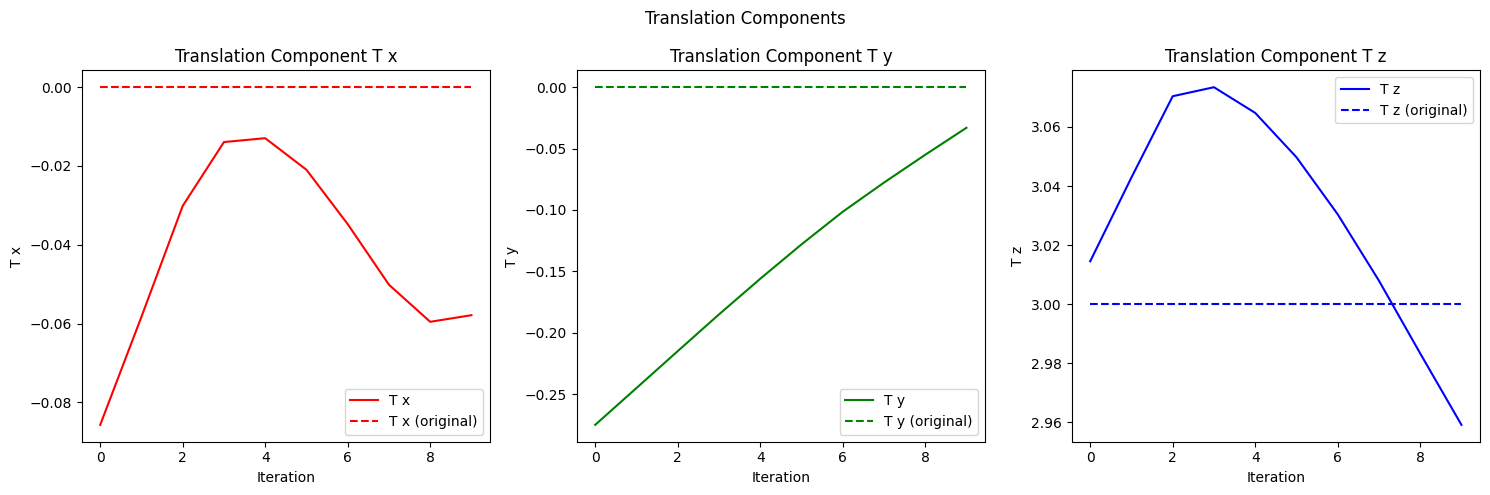

In [11]:
plot_translations(T_gt, parameter_updates)

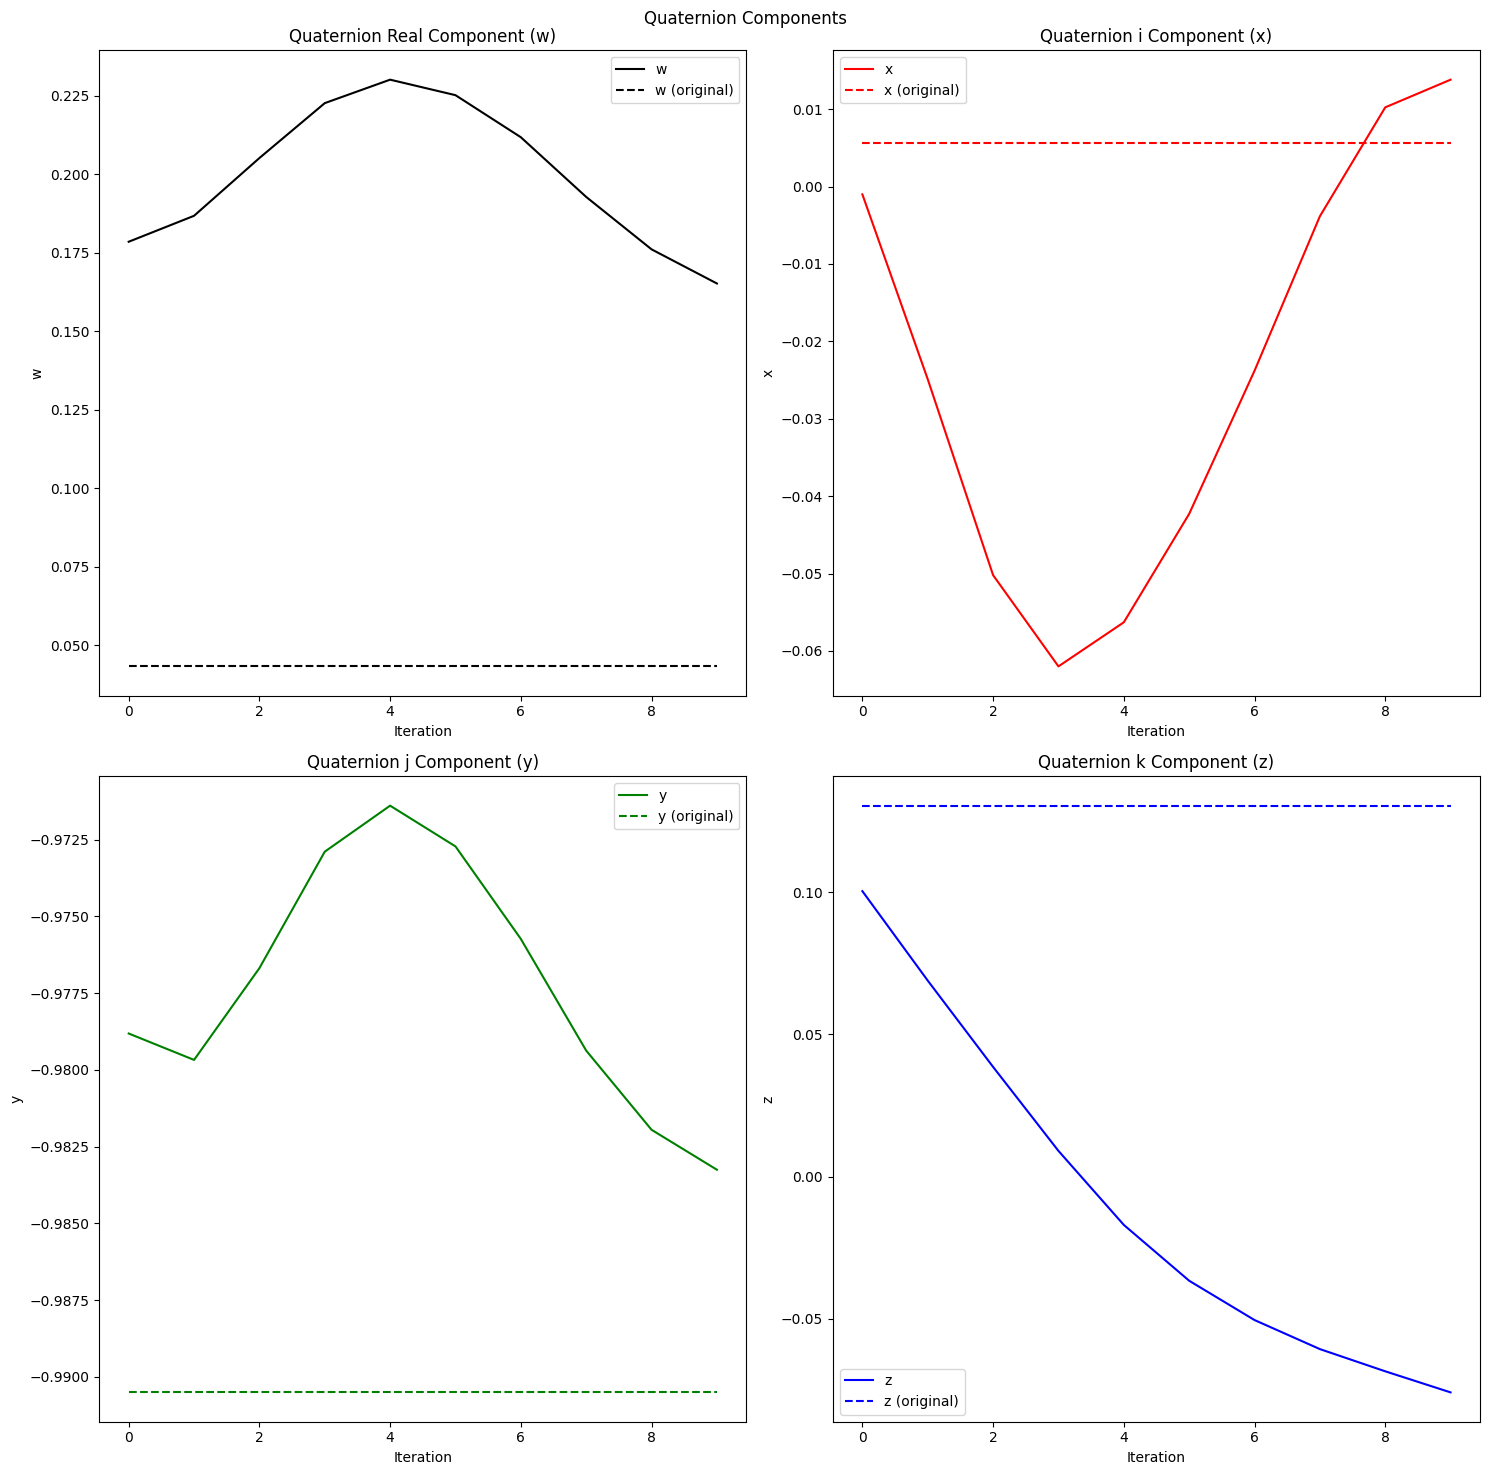

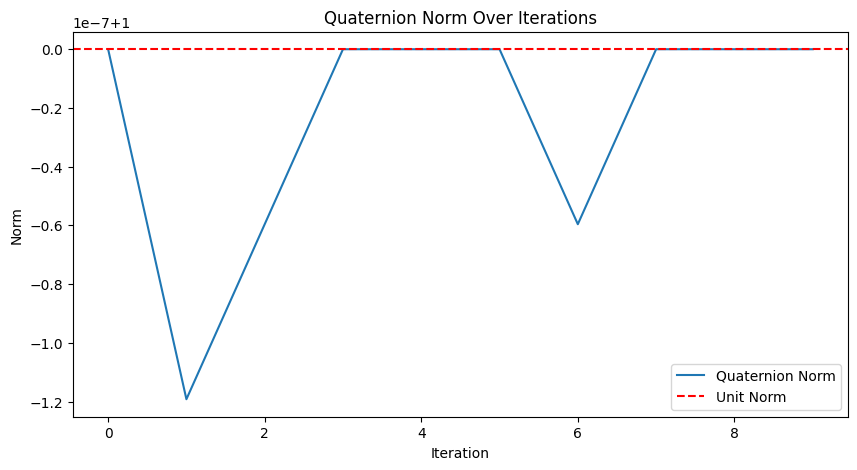

In [15]:
plot_quaternions(R_gt, parameter_updates)